In [1]:
!wget http://www.stickpng.com/assets/images/580b57fbd9996e24bc43bd50.png

--2018-10-26 19:17:56--  http://www.stickpng.com/assets/images/580b57fbd9996e24bc43bd50.png
Resolving www.stickpng.com (www.stickpng.com)... 34.247.239.161, 34.246.205.181, 34.251.216.39, ...
Connecting to www.stickpng.com (www.stickpng.com)|34.247.239.161|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193579 (189K) [image/png]
Saving to: ‘580b57fbd9996e24bc43bd50.png.2’

580b57fbd9996e24bc4 100%[===================>] 189.04K   606KB/s    in 0.3s    

2018-10-26 19:17:57 (606 KB/s) - ‘580b57fbd9996e24bc43bd50.png.2’ saved [193579/193579]



In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models, layers
from keras.utils import to_categorical



Using TensorFlow backend.


In [0]:
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

In [5]:
x_tr = x_tr.astype('Float32')/255
x_te = x_te.astype('Float32')/255

x_tr = x_tr.reshape(x_tr.shape[0],x_tr.shape[1]*x_tr.shape[2])
x_te = x_te.reshape(x_te.shape[0],x_te.shape[1]*x_te.shape[2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


In [0]:
y_tr = to_categorical(y_tr)
y_te = to_categorical(y_te)

In [0]:
x_val = x_tr[:10000]
y_val = y_tr[:10000]

x_tr = x_tr[10000:]
y_tr = y_tr[10000:]

In [0]:
def simple_model():
  model = models.Sequential()
  
  model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
  model.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
  model.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
  model.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
  
  model.add(layers.Dense(10, activation = 'softmax'))
  
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
  
  return model

In [0]:
s_model = simple_model()

In [0]:
#y_te.shape

In [10]:
simple_hist = s_model.fit(x_tr, y_tr, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 108us/step - loss: 0.3055 - acc: 0.9090 - val_loss: 0.1619 - val_acc: 0.9553
Epoch 2/10
50000/50000 [==============================] - 4s 90us/step - loss: 0.1197 - acc: 0.9675 - val_loss: 0.1264 - val_acc: 0.9667
Epoch 3/10
50000/50000 [==============================] - 4s 90us/step - loss: 0.0905 - acc: 0.9762 - val_loss: 0.1368 - val_acc: 0.9690
Epoch 4/10
50000/50000 [==============================] - 4s 89us/step - loss: 0.0754 - acc: 0.9815 - val_loss: 0.1979 - val_acc: 0.9628
Epoch 5/10
50000/50000 [==============================] - 4s 89us/step - loss: 0.0709 - acc: 0.9836 - val_loss: 0.1114 - val_acc: 0.9724
Epoch 6/10
50000/50000 [==============================] - 4s 90us/step - loss: 0.0655 - acc: 0.9852 - val_loss: 0.1162 - val_acc: 0.9744
Epoch 7/10
50000/50000 [==============================] - 4s 90us/step - loss: 0.0596 - acc: 0.9865 - val_loss: 0.2155 - val_ac

In [0]:
simple_hist = simple_hist.history

In [12]:
simple_hist.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
def print_acc(hist):
  epochs = range(1, len(hist['acc'])+1)
  plt.plot(epochs, hist['acc'], 'b', label='Training acc')
  plt.plot(epochs, hist['val_acc'], 'r', label='Validation acc')
  plt.title('Training and validation Acc')
  plt.xlabel('Epochs')
  plt.ylabel('Acc')
  plt.legend()
  plt.show()

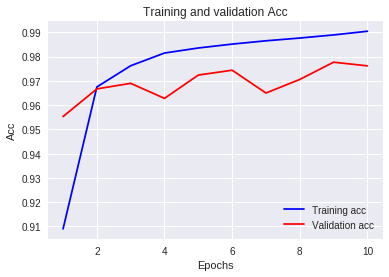

In [14]:
print_acc(simple_hist)

In [0]:
def print_loss(hist):
  epochs = range(1,len(hist['loss'])+1)
  plt.plot(epochs, hist['loss'], 'b', label='Loss Training')
  plt.plot(epochs, hist['val_loss'], 'r', label = 'Loss Validation')
  plt.xlabel('EPOCHS')
  plt.ylabel('Loss')
  plt.title('Training & Validation Loss')
  plt.legend()
  plt.show()

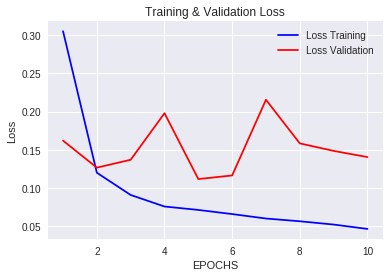

In [16]:
print_loss(simple_hist)